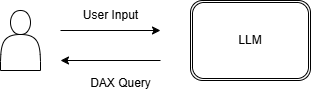

In [1]:
# Import
import os
from dotenv import load_dotenv
from openai import OpenAI

In [2]:
load_dotenv(override=True)

True

In [3]:
# load api_key
AZURE_OPENAI_ENDPOINT = os.getenv('AZURE_OPENAI_ENDPOINT')
AZURE_OPENAI_DEPLOYMENT_NAME = os.getenv('AZURE_OPENAI_DEPLOYMENT_NAME')
AZURE_OPENAI_API_VERSION = os.getenv('AZURE_OPENAI_API_VERSION')
AZURE_OPENAI_API_KEY = os.getenv('AZURE_OPENAI_API_KEY')
AZURE_OPENAI_MODEL = os.getenv('AZURE_OPENAI_MODEL')


if AZURE_OPENAI_API_KEY:
    print(f"Open API Key exists and begins {AZURE_OPENAI_ENDPOINT[:8]}")

if AZURE_OPENAI_MODEL:
    print(f"The model {AZURE_OPENAI_MODEL}")

Open API Key exists and begins https://
The model gpt-4o


In [4]:
# Define a singleton client

openAIClient = OpenAI(
  api_key=AZURE_OPENAI_API_KEY,
  base_url=f"{AZURE_OPENAI_ENDPOINT}/openai/deployments/{AZURE_OPENAI_DEPLOYMENT_NAME}",
  default_query={"api-version": AZURE_OPENAI_API_VERSION},
  default_headers={"api-key": AZURE_OPENAI_API_KEY}
)

In [5]:
from pathlib import Path

file_path = Path('docs') / 'instructions_orig.txt'

with open(file_path, 'r', encoding='utf-8') as f:
  instruction = f.read()

print(instruction)

You are a senior Power BI DAX Query Engineer.
Your task is to generate executable DAX queries for Power BI to answer USER QUESTION.

RULES:
- Return ONLY a valid DAX query
- Use the TABLES, RELATIONSHIPS and MEASURES to form the DAX query
- Use the GUIDELINES when form the DAX query
- User EVALUATE to return results
- Do NOT use DEFINE, VAR, or custom measures
- The query MUST be executable in Power BI
- DO NOT include explanations, comments, or markdown
- DO NOT wrap the query in code fences
- If required information is missing, return:
  "INSUFFICIENT CONTEXT: <reason>"

TABLES:
- MST_CUSTOMER: Customers information
- MST_DISTRIBUTOR: Distributors information
- MST_PRODUCT: Products information
- MST_ROUTE: Routes information
- TXN_INVOICE: Invoice transactions
- MST_CALENDAR: Calendar information

MST_CUSTOMER
- [TENANT] (Text): tenant
- [MARKET] (Text): Country name
- [CUST_ID] (Text): Sales customer ID
- [CUST_CD] (Text): Sales customer code
- [CUST_NAME] (Text): Sales customer na

In [6]:
def runLLM(client, user_input):
    """
    Call the LLM model
    client: openAI client
    user_input: the prompt of user
    """
    content = instruction.replace('<MESSAGE>', user_input)

    # Form the message
    messages = [
        {"role": "user", "content": content}
    ]
    
    response = client.chat.completions.create(
        model = AZURE_OPENAI_MODEL,
        messages = messages
    )

    # Return the result
    return response.choices[0].message.content

In [7]:
result = runLLM(openAIClient, 'What are the top 3 distributors based on sales in Jan?')

print(result)

EVALUATE  
TOPN(  
    3,  
    SUMMARIZECOLUMNS(  
        MST_DISTRIBUTOR[DIST_NAME],  
        MST_CALENDAR[MONTH_NAME],  
        FILTER(  
            MST_CALENDAR,  
            MST_CALENDAR[MONTH_NAME] = "January"  
        ),  
        "Total Sales", SUM(TXN_INVOICE[INV_NET_AMT])  
    ),  
    [Total Sales],  
    DESC  
)  
